/tmp/ipython-input-2335183497.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127818 (\N{TANGERINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127815 (\N{GRAPES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


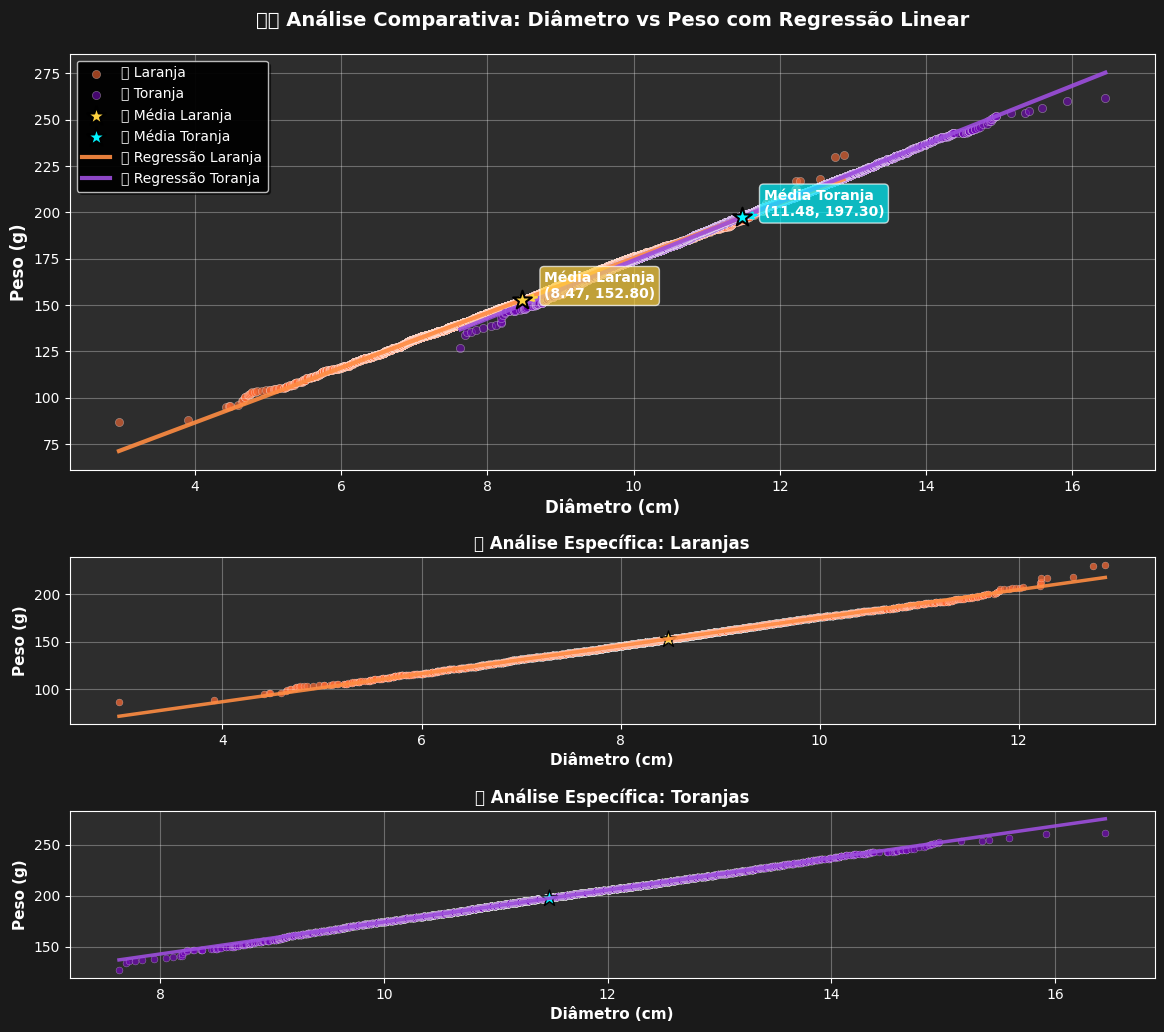

📊 ESTATÍSTICAS DOS DADOS:
🍊 LARANJAS:
   Diâmetro médio: 8.47 cm
   Peso médio: 152.80 g
   Coeficiente angular: 14.80
   Correlação: 0.999

🍇 TORANJAS:
   Diâmetro médio: 11.48 cm
   Peso médio: 197.30 g
   Coeficiente angular: 15.71
   Correlação: 0.999


In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

# --- Ativando o estilo seaborn com tema mais moderno ---
plt.style.use('dark_background')  # Fundo escuro para melhor contraste
sns.set_palette("husl")

# --- Definindo cores personalizadas ---
ORANGE_COLOR = '#FF6B35'      # Laranja vibrante
GRAPEFRUIT_COLOR = '#7209B7'  # Roxo vibrante
MEAN_ORANGE = '#FFD23F'       # Amarelo dourado para média laranja
MEAN_GRAPEFRUIT = '#00F5FF'   # Ciano para média toranja
LINE_ORANGE = '#FF8C42'       # Tom mais claro para linha laranja
LINE_GRAPEFRUIT = '#9D4EDD'   # Tom mais claro para linha toranja

# --- Carregando os dados ---
url_2 = 'https://raw.githubusercontent.com/YuriArduino/Estudos_Numpy/refs/heads/Datas_tests/citrus.csv'
fruit_data = np.loadtxt(url_2, delimiter=',', skiprows=1, usecols=np.arange(1,6))

# --- Separando as frutas ---
# Laranjas
orange_diameters = fruit_data[:5000, 0]  # diâmetros
orange_weights   = fruit_data[:5000, 1]  # pesos

# Toranjas
grapefruit_diameters = fruit_data[5000:, 0]
grapefruit_weights   = fruit_data[5000:, 1]

# --- Função para calcular a reta de regressão ---
def calcular_reta_regressao(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerador = np.sum((x - x_mean) * (y - y_mean))
    denominador = np.sum((x - x_mean) ** 2)
    m = numerador / denominador
    b = y_mean - m * x_mean
    return m, b, x_mean, y_mean

# --- Calculando retas e médias ---
m_laranja, b_laranja, x_mean, y_mean = calcular_reta_regressao(orange_diameters, orange_weights)
m_toranja, b_toranja, z_mean, w_mean = calcular_reta_regressao(grapefruit_diameters, grapefruit_weights)

# --- Preparando a figura com 3 gráficos ---
fig = plt.figure(figsize=(14, 12), facecolor='#1a1a1a')
gs = gridspec.GridSpec(3, 1, height_ratios=[2.5, 1, 1], hspace=0.35)

# --- Gráfico principal (ambas as frutas) ---
ax0 = fig.add_subplot(gs[0])
ax0.set_facecolor('#2d2d2d')

# Scatter plots com maior transparência e tamanhos variados
scatter1 = ax0.scatter(orange_diameters, orange_weights,
                      color=ORANGE_COLOR, label='🍊 Laranja',
                      alpha=0.6, s=35, edgecolors='white', linewidth=0.3)
scatter2 = ax0.scatter(grapefruit_diameters, grapefruit_weights,
                      color=GRAPEFRUIT_COLOR, label='🍇 Toranja',
                      alpha=0.6, s=35, edgecolors='white', linewidth=0.3)

# Pontos de média com destaque
ax0.scatter(x_mean, y_mean, color=MEAN_ORANGE, marker='*', s=200,
           label='⭐ Média Laranja', edgecolors='black', linewidth=1.5, zorder=5)
ax0.scatter(z_mean, w_mean, color=MEAN_GRAPEFRUIT, marker='*', s=200,
           label='⭐ Média Toranja', edgecolors='black', linewidth=1.5, zorder=5)

# Retas de regressão com sombra
x_range_laranja = np.linspace(min(orange_diameters), max(orange_diameters), 100)
y_range_laranja = m_laranja * x_range_laranja + b_laranja
line1 = ax0.plot(x_range_laranja, y_range_laranja, color=LINE_ORANGE,
                linewidth=3, label='📈 Regressão Laranja', linestyle='-', alpha=0.9)

x_range_toranja = np.linspace(min(grapefruit_diameters), max(grapefruit_diameters), 100)
y_range_toranja = m_toranja * x_range_toranja + b_toranja
line2 = ax0.plot(x_range_toranja, y_range_toranja, color=LINE_GRAPEFRUIT,
                linewidth=3, label='📈 Regressão Toranja', linestyle='-', alpha=0.9)

# Anotações melhoradas
ax0.annotate(f'Média Laranja\n({x_mean:.2f}, {y_mean:.2f})',
             xy=(x_mean, y_mean), xytext=(x_mean+0.3, y_mean+0.8),
             arrowprops=dict(arrowstyle='->', color=MEAN_ORANGE, lw=2),
             fontsize=10, color='white', weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor=MEAN_ORANGE, alpha=0.7))

ax0.annotate(f'Média Toranja\n({z_mean:.2f}, {w_mean:.2f})',
             xy=(z_mean, w_mean), xytext=(z_mean+0.3, w_mean+0.8),
             arrowprops=dict(arrowstyle='->', color=MEAN_GRAPEFRUIT, lw=2),
             fontsize=10, color='white', weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor=MEAN_GRAPEFRUIT, alpha=0.7))

ax0.set_xlabel('Diâmetro (cm)', fontsize=12, color='white', weight='bold')
ax0.set_ylabel('Peso (g)', fontsize=12, color='white', weight='bold')
ax0.set_title('🍊🍇 Análise Comparativa: Diâmetro vs Peso com Regressão Linear',
              fontsize=14, color='white', weight='bold', pad=20)
ax0.legend(loc='upper left', framealpha=0.9, fancybox=True, shadow=True)
ax0.grid(True, alpha=0.3, color='white')
ax0.tick_params(colors='white')

# --- Gráfico só laranjas ---
ax1 = fig.add_subplot(gs[1])
ax1.set_facecolor('#2d2d2d')

ax1.scatter(orange_diameters, orange_weights, color=ORANGE_COLOR, alpha=0.7, s=25,
           edgecolors='white', linewidth=0.2)
ax1.scatter(x_mean, y_mean, color=MEAN_ORANGE, marker='*', s=150,
           label='Média', edgecolors='black', linewidth=1)
ax1.plot(x_range_laranja, y_range_laranja, color=LINE_ORANGE, linewidth=2.5, alpha=0.9)

ax1.set_xlabel('Diâmetro (cm)', fontsize=11, color='white', weight='bold')
ax1.set_ylabel('Peso (g)', fontsize=11, color='white', weight='bold')
ax1.set_title('🍊 Análise Específica: Laranjas', fontsize=12, color='white', weight='bold')
ax1.grid(True, alpha=0.3, color='white')
ax1.tick_params(colors='white')

# --- Gráfico só toranjas ---
ax2 = fig.add_subplot(gs[2])
ax2.set_facecolor('#2d2d2d')

ax2.scatter(grapefruit_diameters, grapefruit_weights, color=GRAPEFRUIT_COLOR, alpha=0.7, s=25,
           edgecolors='white', linewidth=0.2)
ax2.scatter(z_mean, w_mean, color=MEAN_GRAPEFRUIT, marker='*', s=150,
           label='Média', edgecolors='black', linewidth=1)
ax2.plot(x_range_toranja, y_range_toranja, color=LINE_GRAPEFRUIT, linewidth=2.5, alpha=0.9)

ax2.set_xlabel('Diâmetro (cm)', fontsize=11, color='white', weight='bold')
ax2.set_ylabel('Peso (g)', fontsize=11, color='white', weight='bold')
ax2.set_title('🍇 Análise Específica: Toranjas', fontsize=12, color='white', weight='bold')
ax2.grid(True, alpha=0.3, color='white')
ax2.tick_params(colors='white')

# Ajuste final do layout
plt.tight_layout()
plt.show()

# --- Estatísticas dos dados ---
print("📊 ESTATÍSTICAS DOS DADOS:")
print("="*50)
print(f"🍊 LARANJAS:")
print(f"   Diâmetro médio: {x_mean:.2f} cm")
print(f"   Peso médio: {y_mean:.2f} g")
print(f"   Coeficiente angular: {m_laranja:.2f}")
print(f"   Correlação: {np.corrcoef(orange_diameters, orange_weights)[0,1]:.3f}")
print()
print(f"🍇 TORANJAS:")
print(f"   Diâmetro médio: {z_mean:.2f} cm")
print(f"   Peso médio: {w_mean:.2f} g")
print(f"   Coeficiente angular: {m_toranja:.2f}")
print(f"   Correlação: {np.corrcoef(grapefruit_diameters, grapefruit_weights)[0,1]:.3f}")